## Analysis

#### 0. Create a goal for your project from the proposal you submitted. Articulate that goal in a short paragraph.

After the proposal submission, our group switched our project focus from EV adoption to lung cancer and the factors associated with lung cancer. 

Now, the goal of our project is to investigate the potential relationship between air quality and lung cancer incidence, utilizing geographical data on air quality alongside survey data on participants' health behaviors and experiences, including smoking habits, anxiety levels, alcohol consumption, and other relevant factors. By analyzing the spatial distribution of lung cancer cases in relation to air pollution levels and individual health characteristics, we aim to identify potential correlations, risk factors, and geographical patterns that may contribute to the development of lung cancer. This comprehensive analysis will provide valuable insights into the complex interplay between environmental factors, individual behaviors, and lung cancer risk, aiding in the development of targeted interventions and public health strategies for prevention and management.

#### 1. Familiarize yourself with the data sets. Here are questions that I want you to answer:

* What is the dataset size (how many rows and columns)?
* What are the column names?
* Classify each column as - categorical, ordinal, discrete, or continuous.
* For categorical data, find the discrete values.
* For categorical data, find the distribution of the discrete values. In particular, identify the mode.
* For quantitative data (discrete or continuous), find the range, median, mean, and standard deviation. What are the units? Do this for columns where it makes sense. If the column has social security numbers, none of the statistics mentioned is relevant.

In [17]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
air_cancer_df = pd.read_excel('Data_Set_Final_LTD_Slope_Intercept.xlsx')
survey_df = pd.read_csv('survey lung cancer.csv')

In [19]:
# data wrangling "air_cancer_df"
air_cancer_df.shape

(2602, 34)

In [20]:
air_cancer_df.columns

Index(['FIPS_code', 'County', 'State', 'Lung Cancer', 'PM2.5',
       'Status Variable', 'Land_EQI', 'Sociod_EQI', 'Built_EQI', 'LTD',
       'Intercept', 'Slope', 'CLU50_1', 'PM10', 'SO2', 'NO2', 'O3', 'CO', 'CN',
       'Disel', 'CS2', 'Air_EQI', 'Water_EQI', 'EQI', 'Status', 'LCI', 'UCI',
       'Inter', 'Slp', 'control', 'treat', 'Local_Treat', 'AAC', 'RT'],
      dtype='object')

In [21]:
air_cancer_df.head()

,FIPS_code,County,State,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,...,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC,RT
0,1001,Autauga,AL,73.9,12.06,1,-0.706591,0.670436,-0.497301,4.79,...,2,64.3,84.6,42.94,2.60,68.6143,73.4043,4.7900,44,stable
1,1003,Baldwin,AL,68.4,11.12,1,-1.084299,0.553073,0.401585,3.68,...,2,63.9,73.1,40.54,2.76,66.0568,69.7357,3.6789,181,stable
2,1005,Barbour,AL,76.1,12.36,1,-1.281470,-1.236294,0.048854,0.87,...,2,63.3,90.9,77.48,-0.11,75.7286,76.6000,0.8714,26,stable
3,1007,Bibb Cou,AL,86.4,12.24,1,-0.827410,-0.600018,-1.290857,19.95,...,2,71.2,104.1,-6.00,7.64,65.9182,85.8692,19.9510,23,stable
4,1009,Blount C,AL,73.1,12.97,1,-0.622934,0.296509,-1.262740,19.95,...,2,64.5,82.6,37.83,3.36,69.9500,76.9564,7.0064,54,stable


In [22]:
air_cancer_df.tail()

,FIPS_code,County,State,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,...,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC,RT
2597,56037,Sweetwat,WY,45.3,6.40,0,0.329106,0.832869,1.309324,5.31,...,1,35.4,57.0,NaN,NaN,NaN,NaN,NaN,16,stable
2598,56039,Teton Co,WY,22.6,6.67,0,0.316508,1.812128,2.418939,1.14,...,1,14.1,34.4,NaN,NaN,NaN,NaN,NaN,5,stable
2599,56041,Uinta Co,WY,37.1,6.57,0,0.253324,0.715908,1.134188,10.86,...,1,25.2,52.5,NaN,NaN,NaN,NaN,NaN,7,stable
2600,56043,Washakie,WY,51.1,6.33,0,0.151024,-0.067995,0.728454,10.52,...,1,35.1,73.3,NaN,NaN,NaN,NaN,NaN,7,stable
2601,56045,Weston C,WY,46.4,5.24,0,0.297553,0.043923,0.637936,10.52,...,1,29.5,70.8,NaN,NaN,NaN,NaN,NaN,5,stable


In [23]:
air_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS_code        2602 non-null   int64  
 1   County           2602 non-null   object 
 2   State            2602 non-null   object 
 3   Lung Cancer      2602 non-null   float64
 4   PM2.5            2602 non-null   float64
 5   Status Variable  2602 non-null   int64  
 6   Land_EQI         2602 non-null   float64
 7   Sociod_EQI       2602 non-null   float64
 8   Built_EQI        2602 non-null   float64
 9   LTD              2602 non-null   float64
 10  Intercept        2602 non-null   float64
 11  Slope            2602 non-null   float64
 12  CLU50_1          2602 non-null   int64  
 13  PM10             2602 non-null   float64
 14  SO2              2602 non-null   float64
 15  NO2              2602 non-null   float64
 16  O3               2602 non-null   float64
 17  CO            

In [24]:
air_cancer_df.describe()

,FIPS_code,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,Intercept,Slope,...,EQI,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,...,2602.000000,2602.000000,2602.000000,2602.000000,50.000000,50.000000,50.000000,48.000000,48.000000,2602.000000
mean,30740.508839,69.170907,10.125242,0.505765,0.033273,0.009265,0.079856,12.290988,38.220023,3.067717,...,0.122344,1.505765,57.189008,83.967602,42.526600,1.542600,64.120496,74.504144,10.848558,76.177940
std,15680.442907,17.418000,2.341308,0.500063,0.845161,0.991924,0.863834,10.511386,18.858638,1.896085,...,0.885120,0.500063,16.118834,21.774534,37.839886,10.657343,9.897221,9.807035,10.979733,175.373315
min,1001.000000,12.900000,1.700000,0.000000,-5.115808,-4.809990,-3.992723,-22.440000,-32.970000,-1.150000,...,-3.220000,1.000000,9.200000,17.500000,-32.970000,-70.630000,39.700000,40.840000,-22.440000,3.000000
25%,18027.500000,58.000000,8.452500,0.000000,-0.400679,-0.649570,-0.438983,5.860000,32.460000,2.250000,...,-0.460000,1.000000,46.225000,69.900000,30.252500,1.695000,58.797000,70.618300,4.283850,14.000000
50%,31002.000000,68.600000,10.650000,1.000000,0.174875,0.004630,0.179253,10.520000,35.420000,3.150000,...,0.130000,2.000000,58.300000,82.500000,36.815000,2.905000,62.462450,76.394000,8.531450,28.000000
75%,46080.500000,79.400000,11.860000,1.000000,0.647736,0.617387,0.689862,15.260000,45.590000,3.440000,...,0.750000,2.000000,67.500000,96.200000,50.250000,3.647500,69.900550,78.289300,15.085850,66.000000
max,56045.000000,169.900000,16.910000,1.000000,2.094526,3.979472,3.883786,50.640000,89.590000,10.540000,...,2.850000,2.000000,138.600000,224.400000,255.860000,10.540000,99.800000,96.088200,50.638200,3650.000000


In [25]:
air_cancer_df.replace ('?', np.nan, inplace = True)

In [26]:
air_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS_code        2602 non-null   int64  
 1   County           2602 non-null   object 
 2   State            2602 non-null   object 
 3   Lung Cancer      2602 non-null   float64
 4   PM2.5            2602 non-null   float64
 5   Status Variable  2602 non-null   int64  
 6   Land_EQI         2602 non-null   float64
 7   Sociod_EQI       2602 non-null   float64
 8   Built_EQI        2602 non-null   float64
 9   LTD              2602 non-null   float64
 10  Intercept        2602 non-null   float64
 11  Slope            2602 non-null   float64
 12  CLU50_1          2602 non-null   int64  
 13  PM10             2602 non-null   float64
 14  SO2              2602 non-null   float64
 15  NO2              2602 non-null   float64
 16  O3               2602 non-null   float64
 17  CO            

In [27]:
# Distributions of Discrete Categorical Variables
print(pd.Series(air_cancer_df['County']).mode()[0])
print(pd.Series(air_cancer_df['State']).mode()[0])
print(pd.Series(air_cancer_df['CLU50_1']).mode()[0])
print(pd.Series(air_cancer_df['AAC']).mode()[0])
print(pd.Series(air_cancer_df['RT']).mode()[0])

Washingt
TX
13
7
stable


In [28]:
# Distributions of Quantitative Variables
print(air_cancer_df.describe(include = 'all'))

           FIPS_code    County State  Lung Cancer        PM2.5  \
count    2602.000000      2602  2602  2602.000000  2602.000000   
unique           NaN      1522    47          NaN          NaN   
top              NaN  Washingt    TX          NaN          NaN   
freq             NaN        28   191          NaN          NaN   
mean    30740.508839       NaN   NaN    69.170907    10.125242   
std     15680.442907       NaN   NaN    17.418000     2.341308   
min      1001.000000       NaN   NaN    12.900000     1.700000   
25%     18027.500000       NaN   NaN    58.000000     8.452500   
50%     31002.000000       NaN   NaN    68.600000    10.650000   
75%     46080.500000       NaN   NaN    79.400000    11.860000   
max     56045.000000       NaN   NaN   169.900000    16.910000   

        Status Variable     Land_EQI   Sociod_EQI    Built_EQI          LTD  \
count       2602.000000  2602.000000  2602.000000  2602.000000  2602.000000   
unique              NaN          NaN          NaN

In [29]:
# Drop columns
air_cancer_df.drop(columns=['LCI', 'UCI', 'Intercept', 'Slope'], inplace=True) # Previously computed (confidence intervals, regression line intercept and slope)
air_cancer_df.drop(columns=['Inter', 'Slp', 'control', 'treat', 'Local_Treat'], inplace=True) # Not enough data

In [33]:
# Check the df again
air_cancer_df.describe(include = 'all')

,FIPS_code,County,State,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,...,CO,CN,Disel,CS2,Air_EQI,Water_EQI,EQI,Status,AAC,RT
count,2602.000000,2602,2602,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,...,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602
unique,NaN,1522,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,Washingt,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stable
freq,NaN,28,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2267
mean,30740.508839,NaN,NaN,69.170907,10.125242,0.505765,0.033273,0.009265,0.079856,12.290988,...,604.816897,0.024272,0.393128,0.005450,0.207845,0.042511,0.122344,1.505765,76.177940,NaN
std,15680.442907,NaN,NaN,17.418000,2.341308,0.500063,0.845161,0.991924,0.863834,10.511386,...,798.759705,0.044755,0.388557,0.073157,0.825925,0.985815,0.885120,0.500063,175.373315,NaN
min,1001.000000,NaN,NaN,12.900000,1.700000,0.000000,-5.115808,-4.809990,-3.992723,-22.440000,...,1.112084,0.000128,0.016877,0.000000,-2.819050,-1.641266,-3.220000,1.000000,3.000000,NaN
25%,18027.500000,NaN,NaN,58.000000,8.452500,0.000000,-0.400679,-0.649570,-0.438983,5.860000,...,185.523776,0.007164,0.192441,0.000123,-0.288676,-0.899059,-0.460000,1.000000,14.000000,NaN
50%,31002.000000,NaN,NaN,68.600000,10.650000,1.000000,0.174875,0.004630,0.179253,10.520000,...,356.300533,0.015406,0.296961,0.000323,0.230291,0.250895,0.130000,2.000000,28.000000,NaN
75%,46080.500000,NaN,NaN,79.400000,11.860000,1.000000,0.647736,0.617387,0.689862,15.260000,...,952.495090,0.030441,0.466812,0.000945,0.776526,0.909583,0.750000,2.000000,66.000000,NaN


In [34]:
air_cancer_df.head()

,FIPS_code,County,State,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,...,CO,CN,Disel,CS2,Air_EQI,Water_EQI,EQI,Status,AAC,RT
0,1001,Autauga,AL,73.9,12.06,1,-0.706591,0.670436,-0.497301,4.79,...,4.463225,0.054815,0.388556,0.008080,0.955385,-1.109728,0.00,2,44,stable
1,1003,Baldwin,AL,68.4,11.12,1,-1.084299,0.553073,0.401585,3.68,...,12.875833,0.021069,0.428278,0.001090,0.717964,-0.565911,0.20,2,181,stable
2,1005,Barbour,AL,76.1,12.36,1,-1.281470,-1.236294,0.048854,0.87,...,19.620539,0.014027,0.199725,0.000513,0.131007,-0.978090,-0.95,2,26,stable
3,1007,Bibb Cou,AL,86.4,12.24,1,-0.827410,-0.600018,-1.290857,19.95,...,2.951976,0.009613,0.211741,0.000225,0.065289,-0.968173,-1.09,2,23,stable
4,1009,Blount C,AL,73.1,12.97,1,-0.622934,0.296509,-1.262740,19.95,...,9.362215,0.022128,0.300100,0.000429,0.402194,-0.718645,-0.51,2,54,stable


In [35]:
air_cancer_df.tail()

,FIPS_code,County,State,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,...,CO,CN,Disel,CS2,Air_EQI,Water_EQI,EQI,Status,AAC,RT
2597,56037,Sweetwat,WY,45.3,6.40,0,0.329106,0.832869,1.309324,5.31,...,422.322102,0.007201,0.204528,0.000227,-0.039545,1.130375,1.09,1,16,stable
2598,56039,Teton Co,WY,22.6,6.67,0,0.316508,1.812128,2.418939,1.14,...,3754.236317,0.005966,0.080880,0.000114,-0.557297,1.071576,1.67,1,5,stable
2599,56041,Uinta Co,WY,37.1,6.57,0,0.253324,0.715908,1.134188,10.86,...,1109.005206,0.002770,0.089568,0.000245,-0.814369,1.162652,0.69,1,7,stable
2600,56043,Washakie,WY,51.1,6.33,0,0.151024,-0.067995,0.728454,10.52,...,199.103987,0.011684,0.157553,0.000184,-0.244298,1.004629,0.38,1,7,stable
2601,56045,Weston C,WY,46.4,5.24,0,0.297553,0.043923,0.637936,10.52,...,25.799703,0.002027,0.059740,0.000039,-1.638539,1.039474,-0.04,1,5,stable


In [38]:
# Check correct data format
air_cancer_df.dtypes

FIPS_code            int64
County              object
State               object
Lung Cancer        float64
PM2.5              float64
Status Variable      int64
Land_EQI           float64
Sociod_EQI         float64
Built_EQI          float64
LTD                float64
CLU50_1              int64
PM10               float64
SO2                float64
NO2                float64
O3                 float64
CO                 float64
CN                 float64
Disel              float64
CS2                float64
Air_EQI            float64
Water_EQI          float64
EQI                float64
Status               int64
AAC                  int64
RT                  object
dtype: object

In [40]:
# Check for duplicates
print(air_cancer_df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2597    False
2598    False
2599    False
2600    False
2601    False
Length: 2602, dtype: bool


In [41]:
# Drop duplicates
air_cancer_df_nodup = air_cancer_df.drop_duplicates()

In [42]:
air_cancer_df_nodup.shape

(2602, 25)

In [43]:
air_cancer_df.shape

(2602, 25)

In [55]:
# Find correlation among columns, non-categorical
pd.set_option('display.max_columns', None)
correlation_matrix = air_cancer_df.corr(numeric_only=True)
correlation_matrix

,FIPS_code,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,CLU50_1,PM10,SO2,NO2,O3,CO,CN,Disel,CS2,Air_EQI,Water_EQI,EQI,Status,AAC
FIPS_code,1.000000,-0.104485,-0.144686,-0.155480,0.091090,0.048563,0.072259,0.017137,0.028493,-0.150104,0.316321,0.273623,0.338610,0.420628,0.048411,-0.043373,0.041592,0.063812,0.007592,0.093053,-0.155480,-0.064883
Lung Cancer,-0.104485,1.000000,0.458979,0.383090,-0.205350,-0.293257,-0.257084,0.031461,-0.267160,-0.013775,0.073045,0.061611,0.140421,0.003716,-0.046146,-0.061779,0.038275,0.116286,-0.069856,-0.248540,0.383090,-0.098588
PM2.5,-0.144686,0.458979,1.000000,0.812740,-0.131973,-0.011658,-0.174339,-0.094702,-0.165146,0.483732,0.230623,0.332695,0.304898,0.174732,0.129858,0.305343,0.064710,0.544760,-0.121255,0.049925,0.812740,0.153268
Status Variable,-0.155480,0.383090,0.812740,1.000000,-0.137884,-0.081848,-0.192420,-0.041804,-0.147936,0.345164,0.161817,0.209105,0.233993,0.134003,0.082690,0.178077,0.062146,0.384284,-0.099340,-0.035844,1.000000,0.060569
Land_EQI,0.091090,-0.205350,-0.131973,-0.137884,1.000000,0.355138,0.185916,0.283106,0.664856,0.149346,0.012900,0.010438,0.072230,0.001686,0.086210,0.152851,0.017434,0.063399,0.262714,0.559989,-0.137884,0.075594
Sociod_EQI,0.048563,-0.293257,-0.011658,-0.081848,0.355138,1.000000,0.313020,-0.249376,0.489509,0.289197,0.112315,0.232692,0.194368,0.058773,0.189417,0.336160,0.003967,0.387124,0.113744,0.784707,-0.081848,0.217191
Built_EQI,0.072259,-0.257084,-0.174339,-0.192420,0.185916,0.313020,1.000000,-0.148739,0.267856,0.109157,0.008939,0.084084,0.019056,0.030554,0.239837,0.290734,-0.000798,0.314828,0.123704,0.667263,-0.192420,0.260548
LTD,0.017137,0.031461,-0.094702,-0.041804,0.283106,-0.249376,-0.148739,1.000000,0.062908,-0.064721,-0.046952,-0.110628,-0.037161,-0.017938,-0.069774,-0.117461,0.011376,-0.194161,0.079707,-0.131088,-0.041804,-0.098324
CLU50_1,0.028493,-0.267160,-0.165146,-0.147936,0.664856,0.489509,0.267856,0.062908,1.000000,0.173548,-0.001704,0.020439,0.049465,-0.039975,0.130579,0.214989,0.009271,0.133025,0.186045,0.564341,-0.147936,0.102718
PM10,-0.150104,-0.013775,0.483732,0.345164,0.149346,0.289197,0.109157,-0.064721,0.173548,1.000000,0.155341,0.359763,0.224716,0.163279,0.226817,0.459285,0.025043,0.518830,0.023862,0.376402,0.345164,0.398246


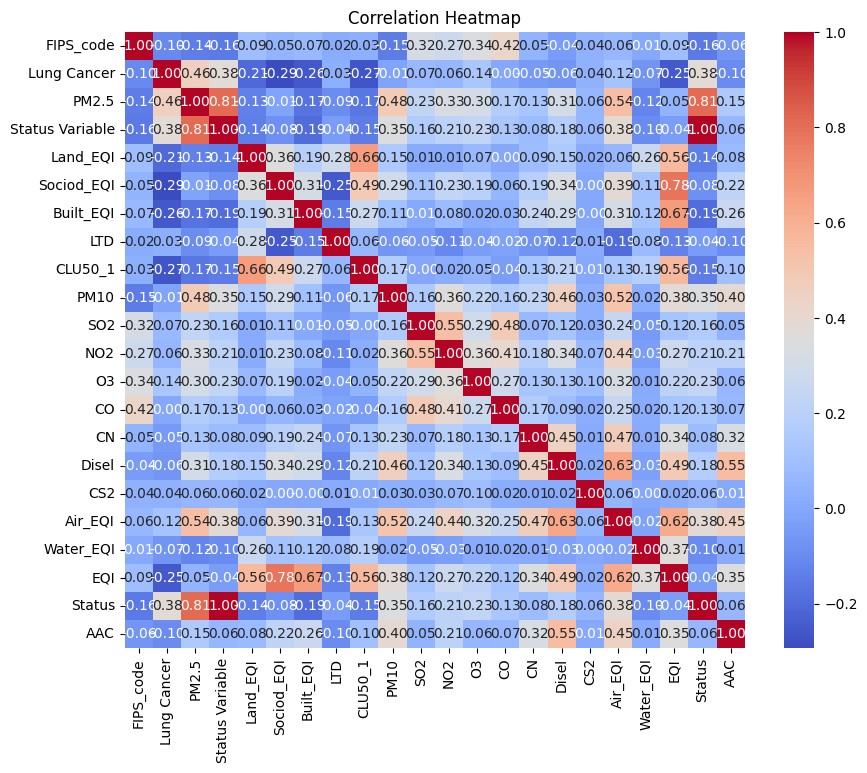

In [56]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [70]:
# Correlation coefficient between Lung Cancer and PM2.5
corr_coefficient = correlation_matrix.loc['Lung Cancer', 'PM2.5']
print(corr_coefficient)

0.4589790201883076


(0.0, 177.75)

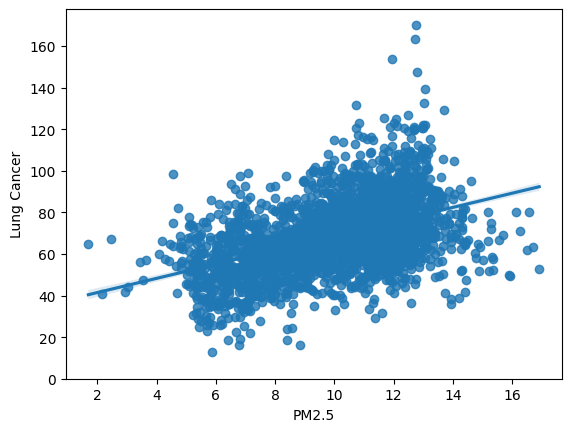

In [72]:
# Regression plot between Lung Cancer and PM2.5
sns.regplot(x = 'PM2.5', y ='Lung Cancer', data = air_cancer_df)
plt.ylim(0,)

In [57]:
# Categorical variable analysis, comparing to Lung Cancer
air_cancer_df.describe(include=['object'])

,County,State,RT
count,2602,2602,2602
unique,1522,47,4
top,Washingt,TX,stable
freq,28,191,2267


C:\Users\maoke\AppData\Local\Temp\ipykernel_29704\3013243179.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  state_lung_boxplot.set_xticklabels(state_lung_boxplot.get_xticklabels(), fontsize=12)
C:\Users\maoke\AppData\Local\Temp\ipykernel_29704\3013243179.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  state_lung_boxplot.set_yticklabels(state_lung_boxplot.get_yticklabels(), fontsize=20)


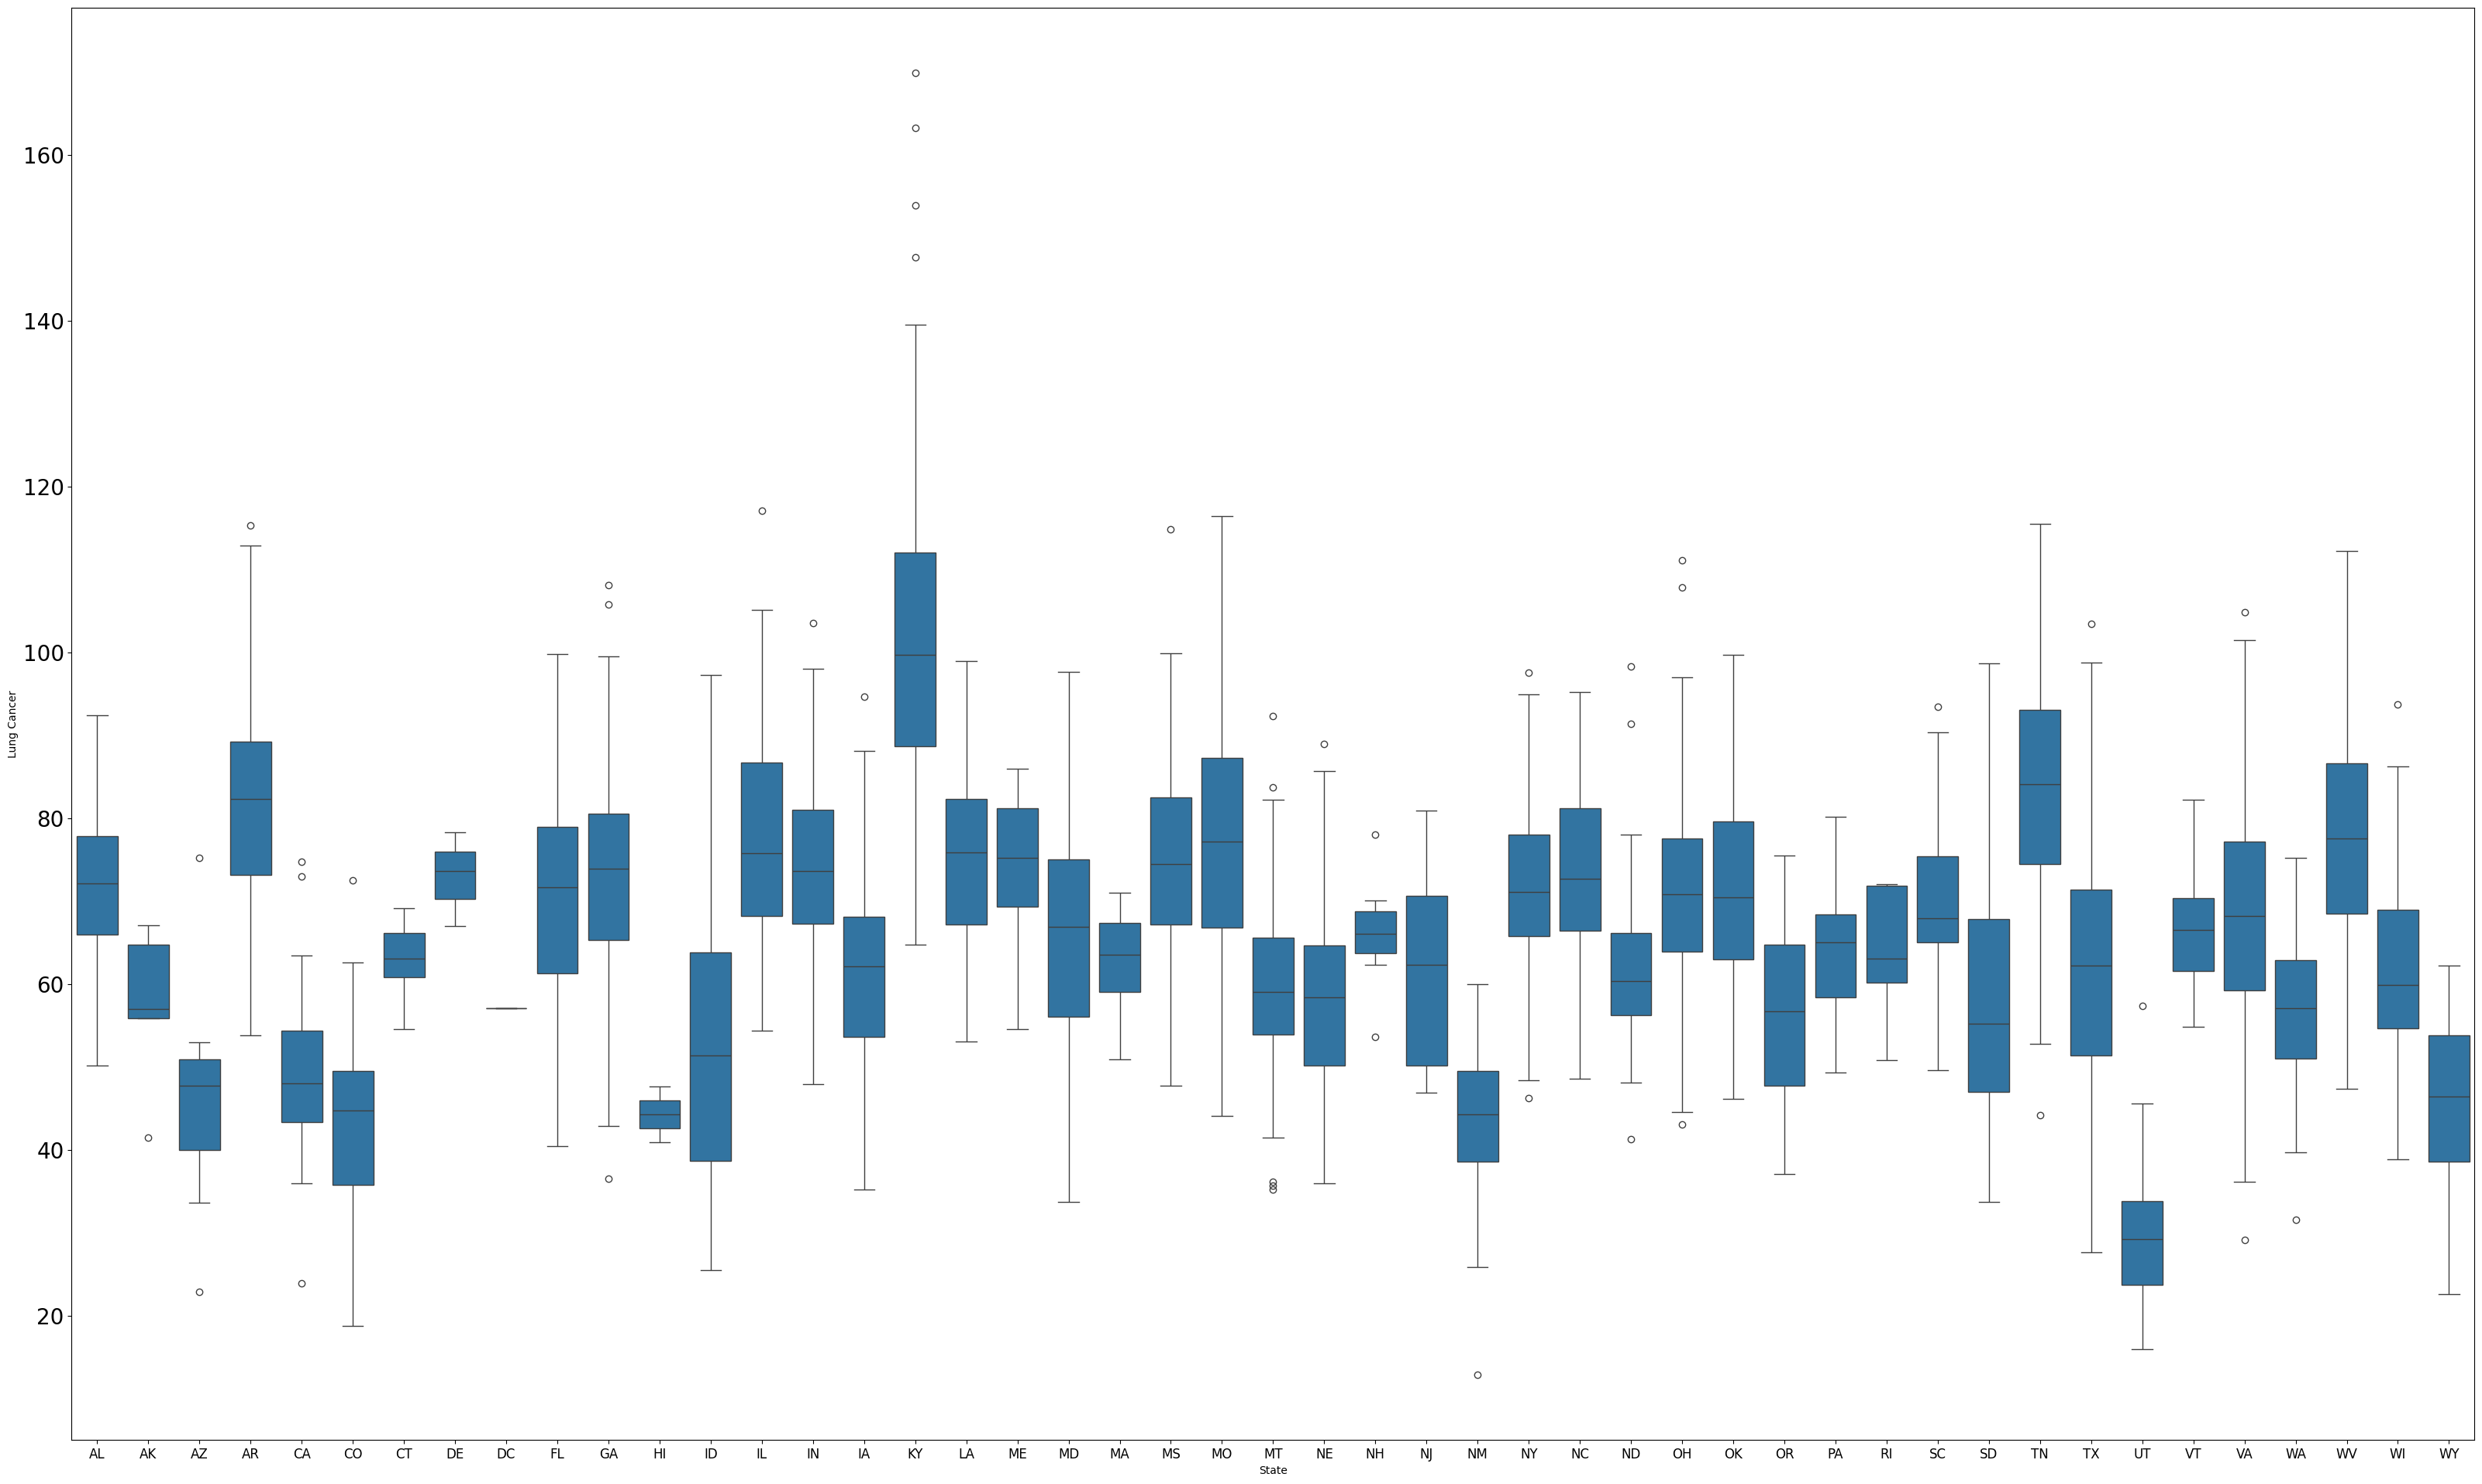

In [66]:
plt.figure(figsize=(40, 24))
state_lung_boxplot = sns.boxplot(x='State', y='Lung Cancer', data=air_cancer_df)


state_lung_boxplot.set_xticklabels(state_lung_boxplot.get_xticklabels(), fontsize=12)
state_lung_boxplot.set_yticklabels(state_lung_boxplot.get_yticklabels(), fontsize=20)
plt.show()

C:\Users\maoke\AppData\Local\Temp\ipykernel_29704\2821800046.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  state_lung_boxplot.set_xticklabels(state_lung_boxplot.get_xticklabels(), fontsize=12)
C:\Users\maoke\AppData\Local\Temp\ipykernel_29704\2821800046.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  state_lung_boxplot.set_yticklabels(state_lung_boxplot.get_yticklabels(), fontsize=20)


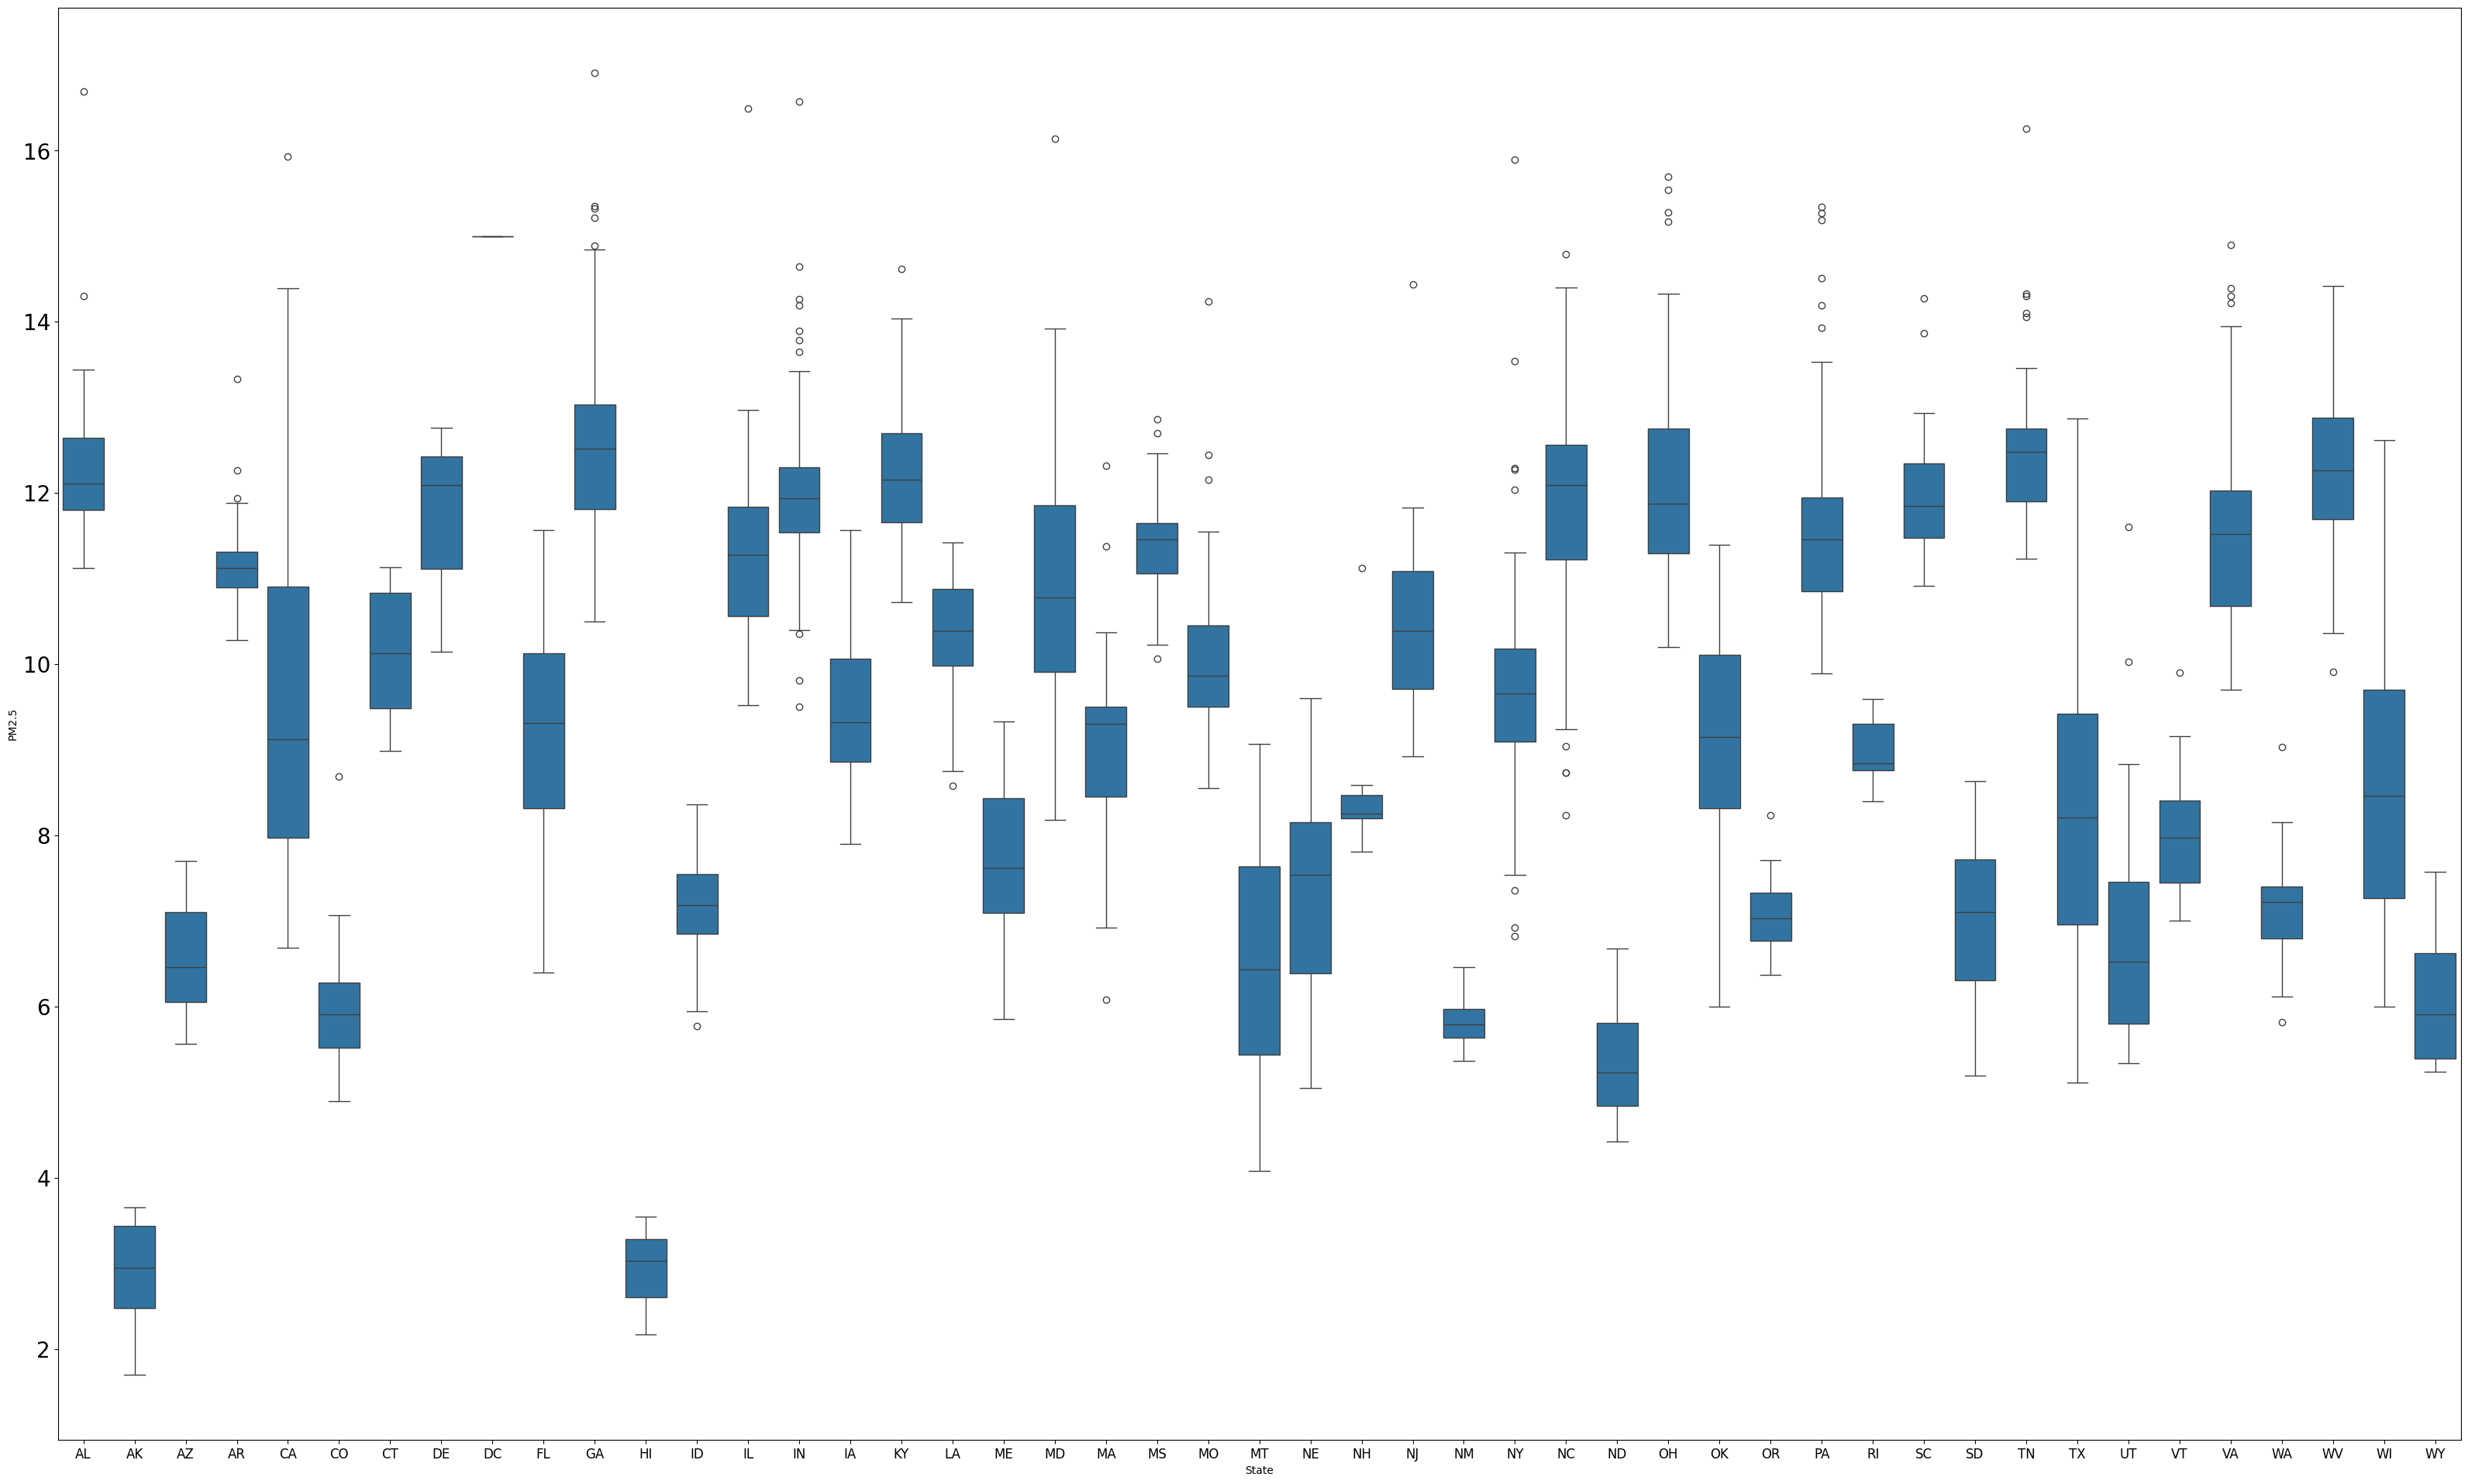

In [68]:
plt.figure(figsize=(40, 24))
state_lung_boxplot = sns.boxplot(x='State', y='PM2.5', data=air_cancer_df)


state_lung_boxplot.set_xticklabels(state_lung_boxplot.get_xticklabels(), fontsize=12)
state_lung_boxplot.set_yticklabels(state_lung_boxplot.get_yticklabels(), fontsize=20)
plt.show()

<Axes: xlabel='RT', ylabel='Lung Cancer'>

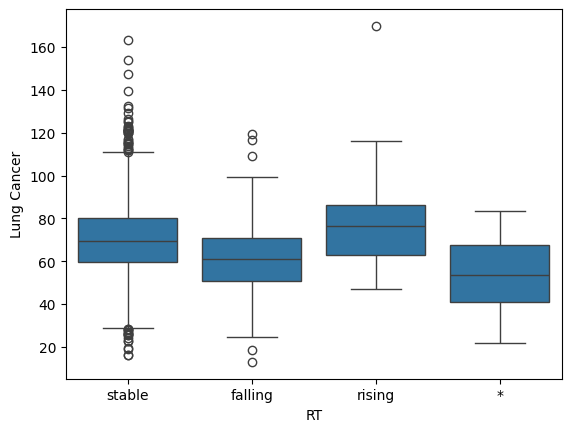

In [62]:
sns.boxplot (x = 'RT', y = 'Lung Cancer', data = air_cancer_df)